In [ ]:
from backend.utils.gmsh_function import *
from backend.src.radiation_algorithm.radiation_algorithm import *
from backend.efield.efield1 import calculate_electric_magnetic_field_at_point
from backend.efield.efield2 import radiation_intensity_distribution_over_sphere_surface
from backend.efield.efield3 import antenna_directivity_pattern

In [2]:
mesh_name = "Monopole_Antenna.msh"
save_mesh_folder = 'data/gmsh_files/'
filename_mesh = 'data/antennas_mesh/Monopole_Antenna.mat'
radiate_strip_msh_gmsh = save_mesh_folder + mesh_name

In [3]:
L_plate = 2.0
W_plate = 2.0
Hight_monopole = 1.0
W_monopole = 0.02

depart_plate_x = -L_plate / 2
depart_plate_y = -W_plate / 2
depart_plate_z = 0

depart_monopole_x = -W_monopole / 2
depart_monopole_y = 0
depart_monopole_z = 0

gmsh.initialize()
gmsh.model.add("Momopole_Antenna")

plate = gmsh.model.occ.addRectangle(-L_plate / 2, -W_plate / 2, 0, L_plate, W_plate)

# Create the monopole
M_P1 = gmsh.model.occ.addPoint(depart_monopole_x, depart_monopole_y, depart_monopole_z)
M_P2 = gmsh.model.occ.addPoint(depart_monopole_x + W_monopole, depart_monopole_y, depart_monopole_z)
M_P3 = gmsh.model.occ.addPoint(depart_monopole_x + W_monopole, depart_monopole_y, depart_monopole_z + Hight_monopole)
M_P4 = gmsh.model.occ.addPoint(depart_monopole_x, depart_monopole_y, depart_monopole_z + Hight_monopole)

M_L1 = gmsh.model.occ.addLine(M_P1, M_P2)
M_L2 = gmsh.model.occ.addLine(M_P2, M_P3)
M_L3 = gmsh.model.occ.addLine(M_P3, M_P4)
M_L4 = gmsh.model.occ.addLine(M_P4, M_P1)

Loop_monopole = gmsh.model.occ.addCurveLoop([M_L1, M_L2, M_L3, M_L4])
Surface_monopole = gmsh.model.occ.addPlaneSurface([Loop_monopole])

# Merge the two surfaces
monopole_antenna, _ = gmsh.model.occ.fuse([(2, plate)], [(2, Surface_monopole)])

gmsh.model.occ.synchronize()

apply_mesh_size(L_plate/10)
gmsh.model.mesh.generate(2)
# run()

write(save_mesh_folder, mesh_name)

gmsh.finalize()

In [4]:
extract_msh_to_mat(radiate_strip_msh_gmsh, filename_mesh)

# Start time measurement
start_time = time.time()

feed_point = np.array([[0, 0, 0]])
frequency = 75e6

radiation_algorithm(filename_mesh, frequency, feed_point, monopole=True)

elapsed_time = time.time() - start_time
print(f"Elapsed time for processing the studied antenna: {elapsed_time:.6f} seconds")
print('\n')


Frequency = 75000000.0 Hz
Wavelength lambda = 3.9966980530747898 m
The observation point is : [100   0   0]

e_field_total of Monopole_Antenna at the observation point [100   0   0] is :
-0.0000567 - 0.0000413i V/m
 0.0000006 + 0.0000031i V/m
-0.0071810 + 0.0059806i V/m

h_field_total of Monopole_Antenna at the observation point [100   0   0] is :
 0.0000000 + 0.0000000i A/m
 0.0000191 + 0.0000159i A/m
 0.0000000 + 0.0000000i A/m

Poynting vector is equal to : 
 0.000000 W/m^2
 0.000000 W/m^2
-0.000000 W/m^2

w = 1.1590226798944686e-07 W/m^2

u = 0.0011590226798944686 W/unit solid angle
Calculating radiation intensity distribution over sphere surface...

Frequency = 75000000.0 Hz
Wavelength lambda = 3.9966980530747898 m

Total Power :  0.011671
Gain Linear :  1.263450
Gain Logarithmic (Max) :  1.015579 dBi

gap_current = (0.022288533250239804-0.017215485774086874j)
Radiation Resistance :  29.429761 Ohms
Input Power (P_in) : 0.0070 W
Total Efficiency : 1.6577
Data saved successfully to

Generating antenna directivity pattern...
Data loaded from data/antennas_gain_power/Monopole_Antenna_gain_power.mat


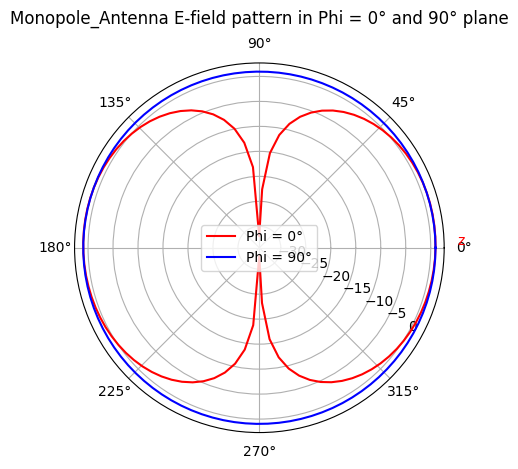

In [5]:
# Dense mesh for a sphere used in radiation calculations
filename_sphere_dense = '../../data/sphere_mesh/sphere_dense.mat'

mesh2_mat = 'data/antennas_mesh2/Monopole_Antenna_mesh2.mat'
current_mat = 'data/antennas_current/Monopole_Antenna_current.mat'
gain_power_mat = 'data/antennas_gain_power/Monopole_Antenna_gain_power.mat'

observationPoint = np.array([100, 0, 0])

calculate_electric_magnetic_field_at_point(mesh2_mat, current_mat, observationPoint, radiation=True)

print("Calculating radiation intensity distribution over sphere surface...")
radiation_intensity_distribution_over_sphere_surface(mesh2_mat, current_mat, filename_sphere_dense, radiation=True)

# Step 3: Generating the directivity pattern
print("Generating antenna directivity pattern...")
antenna_directivity_pattern(mesh2_mat, current_mat, gain_power_mat, radiation=True)